In [1]:
! pip install nltk scikit-learn pandas


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data = {
    'text': [
        "I love programming in Python!",
        "Data Science is amazing.",
        "AI will change the world."
    ],
    'label': ["positive", "positive", "neutral"]
}
df = pd.DataFrame(data)
df.head()


,text,label
0,I love programming in Python!,positive
1,Data Science is amazing.,positive
2,AI will change the world.,neutral


In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

def preprocess(text):
    text = clean_text(text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [6]:
df['cleaned_text'] = df['text'].apply(preprocess)
df.head()


,text,label,cleaned_text
0,I love programming in Python!,positive,love programming python
1,Data Science is amazing.,positive,data science amazing
2,AI will change the world.,neutral,ai change world


In [7]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
df[['label', 'label_encoded']]


,label,label_encoded
0,positive,1
1,positive,1
2,neutral,0


In [8]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned_text'])
X_tfidf.shape  # Check dimensions


(3, 9)

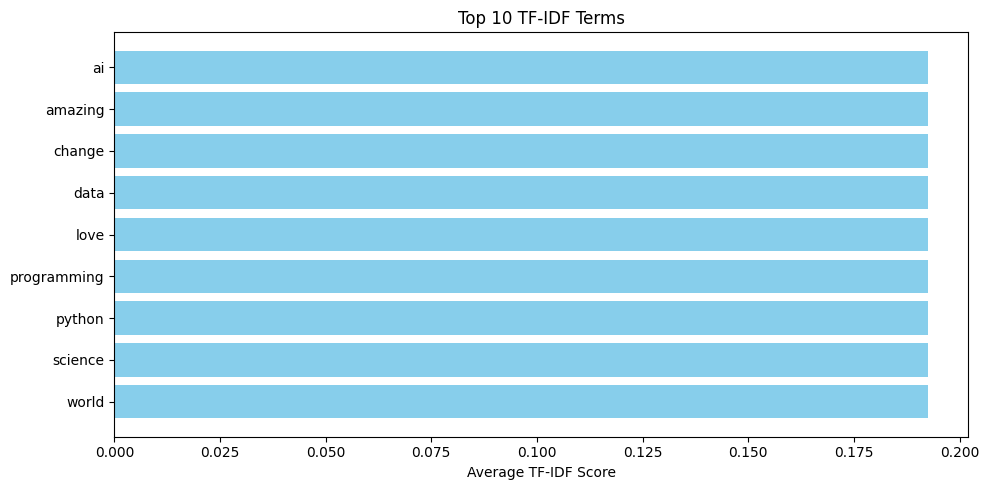

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Compute average TF-IDF score per term
avg_tfidf_scores = np.asarray(X_tfidf.mean(axis=0)).flatten()
terms = tfidf.get_feature_names_out()
tfidf_scores_df = pd.DataFrame({'term': terms, 'avg_score': avg_tfidf_scores})

# Sort and select top N
top_n = 10
top_terms = tfidf_scores_df.sort_values(by='avg_score', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_terms['term'][::-1], top_terms['avg_score'][::-1], color='skyblue')
plt.xlabel("Average TF-IDF Score")
plt.title(f"Top {top_n} TF-IDF Terms")
plt.tight_layout()
plt.show()
